In [182]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from koreanize_matplotlib import koreanize
koreanize()

In [183]:
all_files = []
for year in range(2021, 2025):
    path_pattern = f'./data/넙치csv/{year}/*.csv'
    all_files.extend(glob.glob(path_pattern))

combined_df = pd.concat([pd.read_csv(file, encoding='utf-8') for file in all_files], ignore_index=True)

In [184]:
dfs = []
for year in range(2021, 2025):
    for month in range(1, 13):
        file = f'./data/넙치csv/{year}/{year}-{month}.csv'
        if os.path.exists(file):
            df = pd.read_csv(file, encoding='utf-8')
            df['year'] = year
            df['month'] = month
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [185]:
# datetime 형식
df['date'] = pd.to_datetime(
    dict(year=df['year'], month=df['month'], day=1)
)

In [186]:
df.head()

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date
0,(활)넙치,속초,중,kg,29.2,1.0,"29,000","6,000","20,700",2021,1,2021-01-01
1,(활)넙치,통영,3미,kg,3.4,1.0,"6,000","6,000","6,000",2021,1,2021-01-01
2,(활)넙치,목포,중,kg,505.5,1.0,"33,000","10,000","20,900",2021,1,2021-01-01
3,(활)넙치,부산(기장),중,kg,"1,646.7",1.0,"28,000","7,000","18,800",2021,1,2021-01-01
4,(활)넙치,보령,중,kg,8.3,1.0,"11,000","3,000","8,400",2021,1,2021-01-01


In [206]:
df['산지'].unique()

array(['속초', '통영', '목포', '부산(기장)', '보령', '군산', '서천', '진도', '완도', '여수',
       '중국', '제주도', '안흥', '태안', '나로도', '대부도', '일본', '격포', '고흥', '대천',
       '안면도', '화성', '서산', '신안', '영광', '장항', '부안', '인천', '당진', '후포', '포항',
       '거제도', '동해시', '거진', '임원', '고성', '삼천포', '방어진', '남해', '고창', '강화',
       '강구', '영흥도', '마산'], dtype=object)

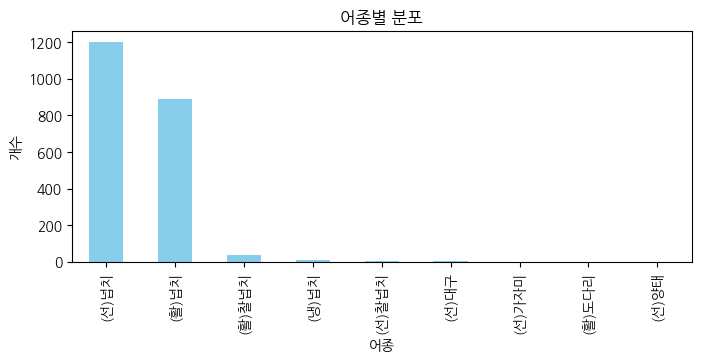

In [219]:
fish = df['어종'].value_counts()

fish.plot(kind='bar', figsize=(8, 3), color='skyblue')
plt.xlabel('어종')
plt.ylabel('개수')
plt.title('어종별 분포')
plt.show()

In [215]:
df['어종'].value_counts()

어종
(선)넙치     1202
(활)넙치      888
(활)찰넙치      38
(냉)넙치        7
(선)찰넙치       4
(선)대구        2
(선)가자미       1
(활)도다리       1
(선)양태        1
Name: count, dtype: int64

In [216]:
df['산지'].value_counts()

산지
제주도       302
군산        201
안흥        184
완도        175
태안        153
통영        140
나로도       139
대부도       120
서천         88
목포         83
대천         78
서산         49
격포         45
보령         43
여수         42
진도         38
인천         36
부산(기장)     32
장항         24
안면도        24
중국         23
남해         17
영흥도        14
속초         13
고흥          9
거제도         8
부안          8
화성          7
포항          6
삼천포         6
후포          6
신안          5
방어진         4
당진          4
동해시         4
거진          3
고창          2
영광          2
강구          2
일본          1
고성          1
임원          1
강화          1
마산          1
Name: count, dtype: int64

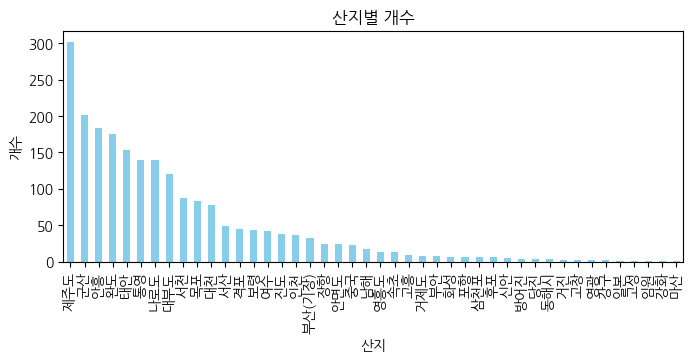

In [218]:
area = df['산지'].value_counts()


area.plot(kind='bar', figsize=(8, 3), color='skyblue')
plt.title('산지별 개수')
plt.xlabel('산지')
plt.ylabel('개수')
plt.show()


In [226]:
fish

어종
(선)넙치     1202
(활)넙치      888
(활)찰넙치      38
(냉)넙치        7
(선)찰넙치       4
(선)대구        2
(선)가자미       1
(활)도다리       1
(선)양태        1
Name: count, dtype: int64

어종별 가장 많이 나오는 산지:
어종
(냉)넙치      여수
(선)가자미    제주도
(선)넙치      군산
(선)대구      대천
(선)양태     대부도
(선)찰넙치    제주도
(활)넙치     제주도
(활)도다리     태안
(활)찰넙치    제주도
dtype: object


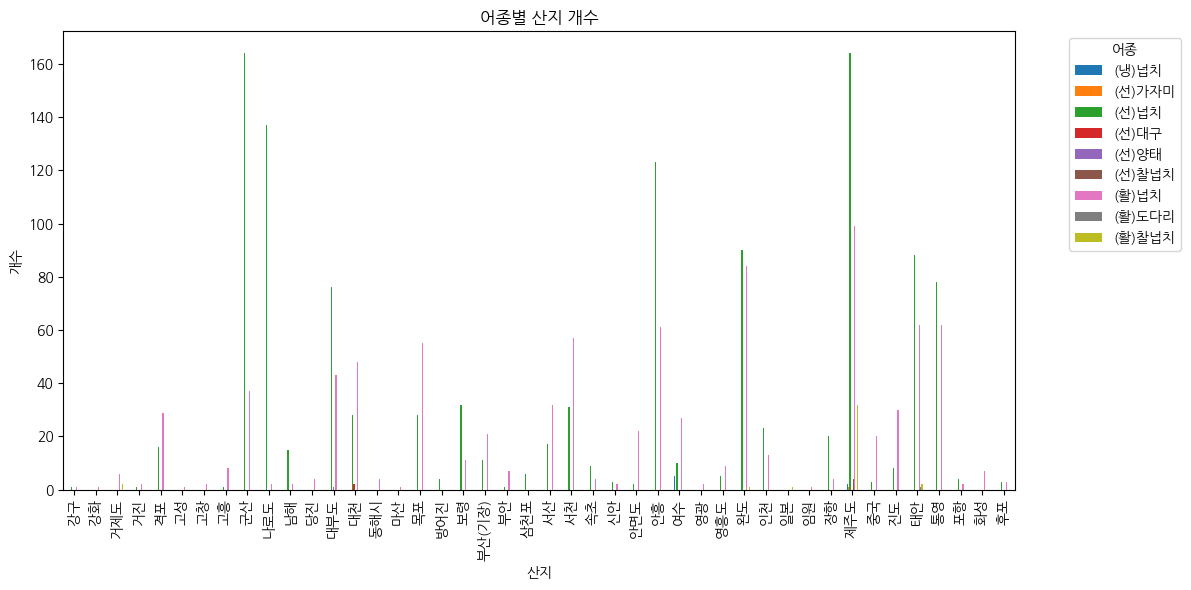

In [229]:
import matplotlib.pyplot as plt

# 1. 어종별 산지 개수 집계 (피벗 테이블 형태)
pivot_df = df.pivot_table(index='산지', columns='어종', aggfunc='size', fill_value=0)

# 2. 어종별로 산지에서 가장 많이 나오는 개수와 산지 확인
most_common_per_species = pivot_df.idxmax()
most_common_counts = pivot_df.max()

print("어종별 가장 많이 나오는 산지:")
print(most_common_per_species)

# 3. 그래프 그리기 (어종별 산지별 개수)
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title('어종별 산지 개수')
plt.xlabel('산지')
plt.ylabel('개수')
plt.legend(title='어종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
